# Introductions
We're interested in finding which neighborhoods in Pittsburgh are best for non-motorized transportation.

Note: What about walkability? This seems more like determining which neighborhoods are best to bike in/ which neighborhoods people bike in the most. We have the safety for biking, the
https://data.wprdc.org/dataset/station-locations

# The Metric

# The Best Neighborhood

In [65]:
from os import mkdir
from os.path import join, exists
from urllib.request import urlopen
import pandas as pd
import geopandas

In [66]:
# Downloading the data if it hasn't been downloaded yet
urls = [
        "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/722bace4-98a3-456b-9029-7d64090e5bd6/download/pogoh-station-locations-october-2023.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/bab6ee9a-81dd-411f-90b3-b65ddc6009f3/download/pogoh-station-locations-august-2023-1.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/dc292334-97be-42d1-822f-8c4e41229920/download/pogoh-station-locations-july-2023.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/f7112f90-0708-4574-9feb-fee9f4caaa36/download/pogoh-station-locations-june-2023.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/a0dbb725-fdc0-481e-b082-d3670bcef3be/download/pogoh-station-locations-february-2023.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/d7778721-e9c7-4d2f-a9c1-4f317db140a1/download/pogoh-station-locations-may-2022.xlsx"
    ]

def download_file(url, folder):
    with urlopen(url) as f:
            filename = url.split('/')[-1]
            with open(join(folder, filename), 'w+b') as g:
                g.write(f.read())

if not exists('data'):
    mkdir('data')
    for url in urls:
        download_file(url, folder='data')

<Axes: >

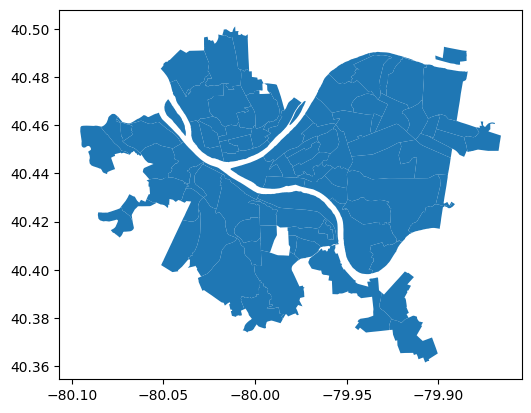

In [67]:
# Reading the shapefile
neighborhoods = geopandas.read_file(join('data','pittsburghpaneighborhoods-.zip'))
neighborhoods.plot()

In [69]:
# Reading the data into one dataframe, adding the dates onto them
from glob import glob
dataframes = []
for file in glob(join('data', '*.xlsx')):
    dataframe = pd.read_excel(file)
    date = ' '.join(file.replace('.','-').split('-')[3:5])
    dataframe['date'] = pd.to_datetime(date, format='%B %Y')
    dataframes.append(dataframe)

df = pd.concat(dataframes)

<Axes: >

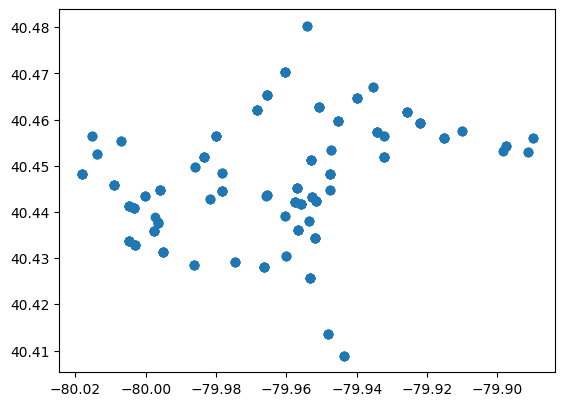

In [70]:
# Converting longitude and latitude values into shapely objects / converting from pandas to geopandas
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

# Adding the neighborhoods to the data
gdf = gdf.sjoin(neighborhoods)

gdf.plot()

# Conclusion